In [17]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from pandas import Series, DataFrame
% matplotlib inline

In [18]:
# Let's try the boston housing price 
boston_housing = datasets.load_boston()
print(boston_housing.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Insert a section here where we seperate the data into 

In [19]:
# Store the data 
data_boston = boston_housing.data
target_boston = boston_housing.target

print('Data shape: ' , data_boston.shape)
print('Target shape' , target_boston.shape)


('Data shape: ', (506L, 13L))
('Target shape', (506L,))


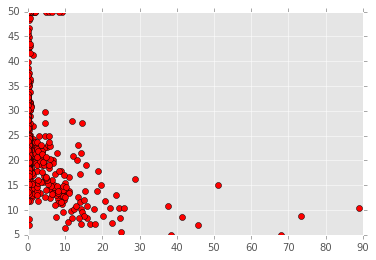

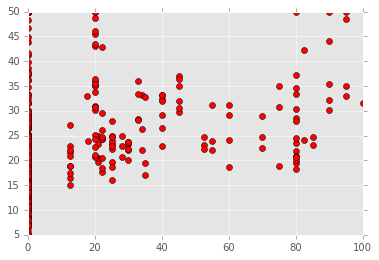

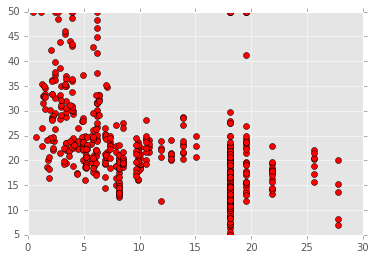

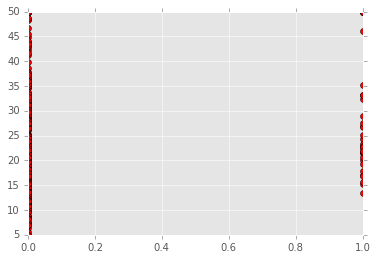

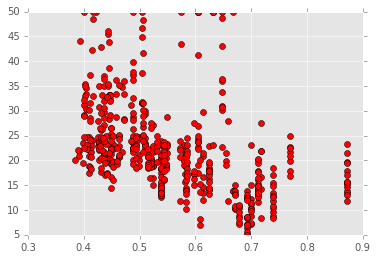

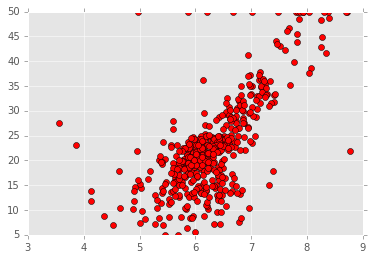

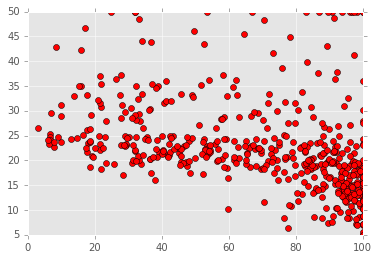

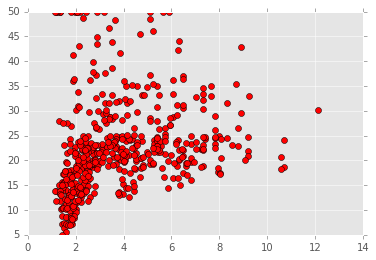

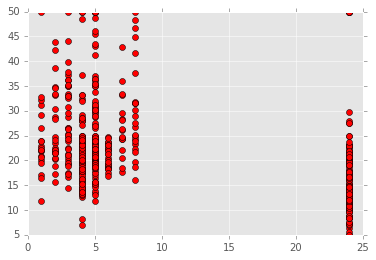

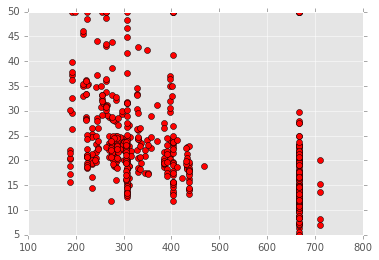

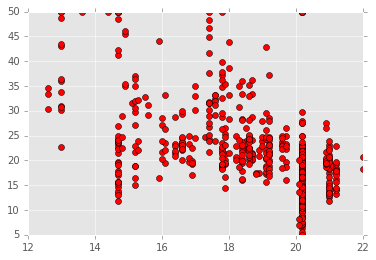

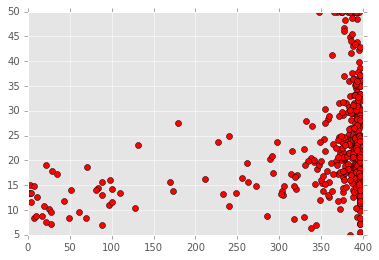

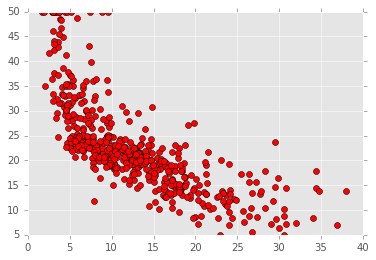

In [20]:
# Plot the first feature
plt.style.use('ggplot')
for i in range(len(data_boston[0,:])):
    plt.figure()
    plt.plot(data_boston[:,i], target_boston,'ro')

## Sci-prog notes
- The thirteenth plot might be nice for regression
- We might also consider some multi-variate regression problems

In [21]:
print(data_boston[:,12].shape)
print(target_boston.shape)

(506L,)
(506L,)


In [22]:
# Reshape data before training
training_features = data_boston[:,12].reshape(506,1)
training_target = target_boston.reshape(506,1)

0.544146297586


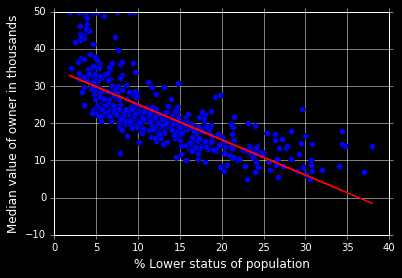

In [23]:
# Let's try some linear regression on the 13th feature
from sklearn import linear_model

# Create an instance of the linear regression class
reg = linear_model.LinearRegression()
reg.fit(training_features, training_target)

# Predict on the training features
preditcions = reg.predict(training_features)

# Plot the fit
plt.style.use('dark_background')
plt.plot(training_features, training_target,'bo', training_features, preditcions, 'r-')
plt.xlabel('% Lower status of population')
plt.ylabel('Median value of owner in thousands')

# Print out the score
print(reg.score(training_features, training_target))

## Polynomial Regression
Next let's try to fit a polynomial to the data

In [24]:
# Create a polynomial model of the data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
training_features_3 = poly.fit_transform(training_features)

0.65784764059


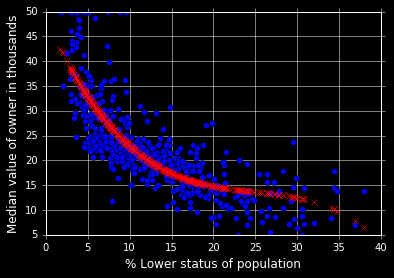

In [25]:
# Create an instance of the linear regression class
reg3 = linear_model.LinearRegression()
reg3.fit(training_features_3, training_target)

# Predict on the training features
preditcions_3 = reg3.predict(training_features_3)

# Plot the fit
plt.plot(training_features, training_target,'bo', training_features, preditcions_3, 'rx')
plt.xlabel('% Lower status of population')
plt.ylabel('Median value of owner in thousands')
print(reg3.score(training_features_3, training_target))


## Multivariate regression

In [26]:
# Let's try the first and last characterstic
first_feature = data_boston[:,0]

In [27]:
first_feature = first_feature.reshape(506,1)
first_feature.shape

(506L, 1L)

In [28]:
second_feature = data_boston[:,12]
second_feature = second_feature.reshape(506,1)
second_feature.shape

(506L, 1L)

In [29]:
training_features = np.concatenate((first_feature,second_feature),axis=1)

In [30]:
training_features.shape

(506L, 2L)

<IPython.core.display.Javascript object>


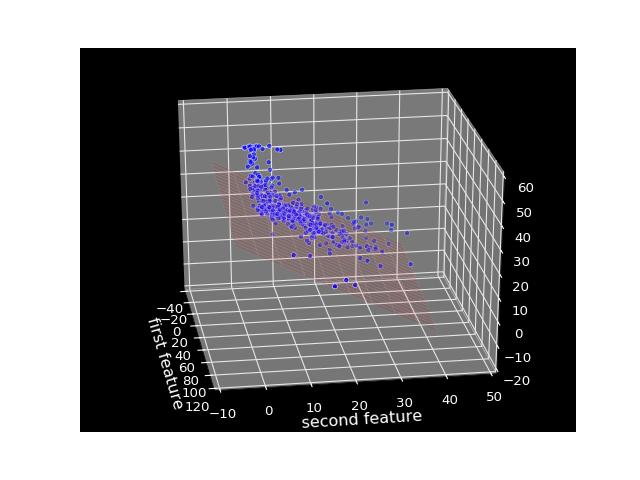

In [32]:
# Let's try to fit the training features to the 
multi_variate_reg = linear_model.LinearRegression()
multi_variate_reg = multi_variate_reg.fit(training_features, training_target)
multi_var_pred = multi_variate_reg.predict(training_features)
multi_var_pred = multi_variate_reg.predict(training_features)

# Create a 3d scatter plot
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(first_feature,second_feature,training_target)
plt.xlabel('first feature')
plt.ylabel('second feature')

# Plot the predicted surface
# Store the coefficients from the regression
c1 = multi_variate_reg.coef_[0][0]
c2 = multi_variate_reg.coef_[0][1]
intercept = multi_variate_reg.intercept_[0]

# Create the meshgrid
X = np.arange(-20, 100, .5)
Y = np.arange(-5, 40, 0.5)
X, Y = np.meshgrid(X, Y)
Z = c1*X + c2*Y +intercept
ax.plot_surface(X, Y, Z, alpha=0.1,color='r')

In [34]:
# Let's try multivariate regression with lots of input features
# In fact, let's try all 12
training_features = data_boston[:,:12]

# Plug the training features into the regression model
reg = linear_model.LinearRegression()
reg = reg.fit(training_features,training_target)
reg.score(training_features, training_target)

0.6839521119105445